<a href="https://colab.research.google.com/github/shahzadmari/DSA_Lab/blob/main/Lab5Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5 Tasks
# Roll no : 20SW067
# section : 1
# Name : Shahzad Haider

**Task 1**

In [1]:
import pandas as pd

distance_from_sun = [149.6, 1433.5, 227.9, 108.2, 778.6]

planets = ['Earth', 'Saturn', 'Mars', 'Venus', 'Jupiter']

dist_planets = pd.Series(distance_from_sun, index=planets)

speed_of_light = 18  # in 10^6 km/minute
time_light = dist_planets / speed_of_light

selected_planets = time_light[time_light < 40]

print(selected_planets)

Earth     8.311111
Mars     12.661111
Venus     6.011111
dtype: float64


**Task 2**

In [2]:
import pandas as pd
import numpy as np

# Create a Pandas DataFrame that contains the ratings some users have given to a

# series of books. The ratings given are in the range from 1 to 5, with 5 being

# the best score. The names of the books, the authors, and the ratings of each user

# are given below:

books = pd.Series(data=['Great Expectations', 'Of Mice and Men', 'Romeo and Juliet', 'The Time Machine', 'Alice in Wonderland'])

authors = pd.Series(data=['Charles Dickens', 'John Steinbeck', 'William Shakespeare', ' H. G. Wells', 'Lewis Carroll'])

user_1 = pd.Series(data=[3.2, np.nan, 2.5])

user_2 = pd.Series(data=[5., 1.3, 4.0, 3.8])

user_3 = pd.Series(data=[2.0, 2.3, np.nan, 4])

user_4 = pd.Series(data=[4, 3.5, 4, 5, 4.2])

# Users that have np.nan values means that the user has not yet rated that book.

# Create a dictionary with the data given above

dat = {
    'Author': authors,
    'Book Title': books,
    'User 1': user_1,
    'User 2': user_2,
    'User 3': user_3,
    'User 4': user_4
}

# Use the dictionary to create a Pandas DataFrame

book_ratings = pd.DataFrame(dat)

# If you created the dictionary correctly you should have a Pandas DataFrame

# that has column labels: 'Author', 'Book Title', 'User 1', 'User 2', 'User 3',

# 'User 4' and row indices 0 through 4.

# Now replace all the NaN values in your DataFrame with the average rating in

# each column. Replace the NaN values in place. HINT: you can use the fillna()

# function with the keyword inplace = True, to do this.

average_ratings = book_ratings.mean()
book_ratings.fillna(average_ratings, inplace=True)

# Now pick all the books that had a rating of 5

best_rated = book_ratings[(book_ratings == 5).any(axis=1)]['Book Title'].values

print("Best rated books:", best_rated)

Best rated books: ['Great Expectations' 'The Time Machine']


<ipython-input-2-09a815660b79>:53: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_ratings = book_ratings.mean()


**Task3 and Mini Project**

Google    3095
Apple     1933
Amazon    1933
dtype: int64
Average stock price:
Google    347.420229
Apple      47.736018
Amazon    216.598177
dtype: float64
Median stock price:
Google    286.397247
Apple      39.461483
Amazon    161.820007
dtype: float64
Standard deviation of stock price:
Google    187.671596
Apple      37.421555
Amazon    199.129792
dtype: float64
Correlation between stocks:
          Google     Apple    Amazon
Google  1.000000  0.900242  0.952444
Apple   0.900242  1.000000  0.886321
Amazon  0.952444  0.886321  1.000000


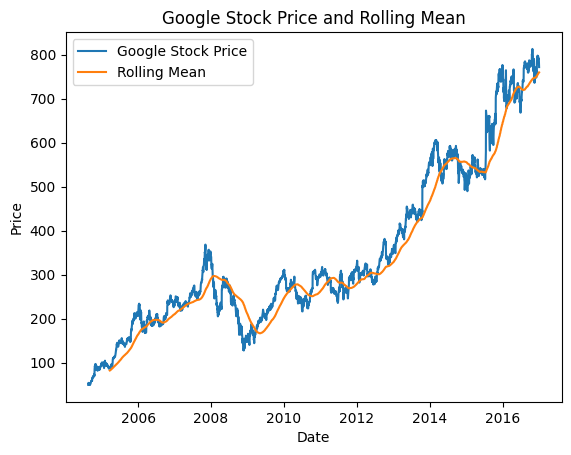

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data into DataFrames
google_stock = pd.read_csv(r'/content/sample_data/GOOG.csv', usecols=['Date', 'Adj Close'], index_col='Date', parse_dates=True)
apple_stock = pd.read_csv(r'/content/sample_data/AAPL.csv', usecols=['Date', 'Adj Close'], index_col='Date', parse_dates=True)
amazon_stock = pd.read_csv(r'/content/sample_data/AMZN.csv', usecols=['Date', 'Adj Close'], index_col='Date', parse_dates=True)

# Create an empty DataFrame with calendar dates as indices
dates = pd.date_range('2000-01-01', '2016-12-31')
all_stocks = pd.DataFrame(index=dates)

# Change column labels to match stock names
google_stock.rename(columns={'Adj Close': 'Google'}, inplace=True)
apple_stock.rename(columns={'Adj Close': 'Apple'}, inplace=True)
amazon_stock.rename(columns={'Adj Close': 'Amazon'}, inplace=True)

# Join stock data to all_stocks DataFrame
all_stocks = all_stocks.join(google_stock)
all_stocks = all_stocks.join(apple_stock)
all_stocks = all_stocks.join(amazon_stock)

# Check for NaN values
print(all_stocks.isnull().sum())

# Remove rows with NaN values
all_stocks.dropna(inplace=True)

# Print average, median, and standard deviation
print("Average stock price:")
print(all_stocks.mean())

print("Median stock price:")
print(all_stocks.median())

print("Standard deviation of stock price:")
print(all_stocks.std())

# Calculate correlation
print("Correlation between stocks:")
print(all_stocks.corr())

# Calculate rolling mean with a 150-Day window for Google stock
rollingMean = all_stocks['Google'].rolling(window=150).mean()

# Plot the stock data and rolling mean
plt.plot(all_stocks['Google'], label='Google Stock Price')
plt.plot(rollingMean, label='Rolling Mean')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Google Stock Price and Rolling Mean')
plt.show()
